<a href="https://colab.research.google.com/github/SUMANADITHYA/Zeotap_Assignment_Suman/blob/main/Suman_Adithya_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [5]:
print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [6]:
print(merged_data.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [7]:
merged_data.fillna(method='ffill', inplace=True)

<ipython-input-7-78668bfffe5e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)


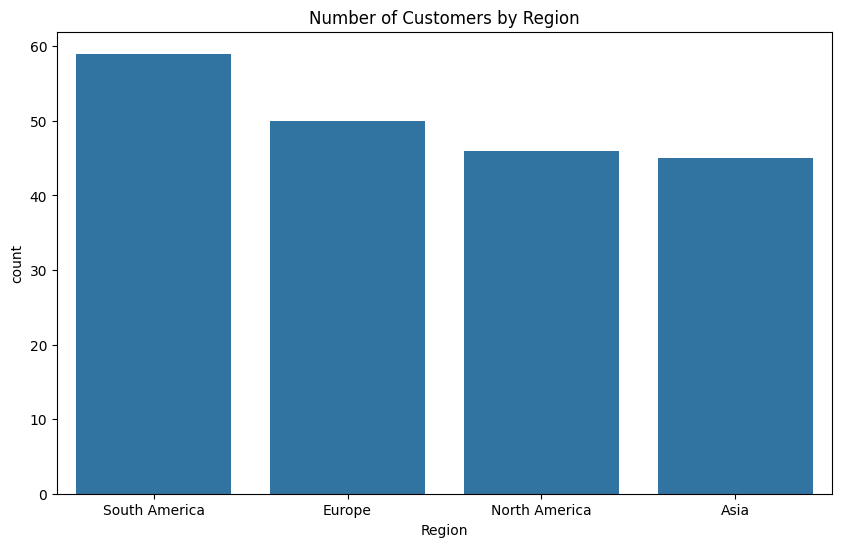

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
plt.title('Number of Customers by Region')
plt.show()

<ipython-input-11-df24324c6016>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=products, x='Category', y='Price', ci=None)


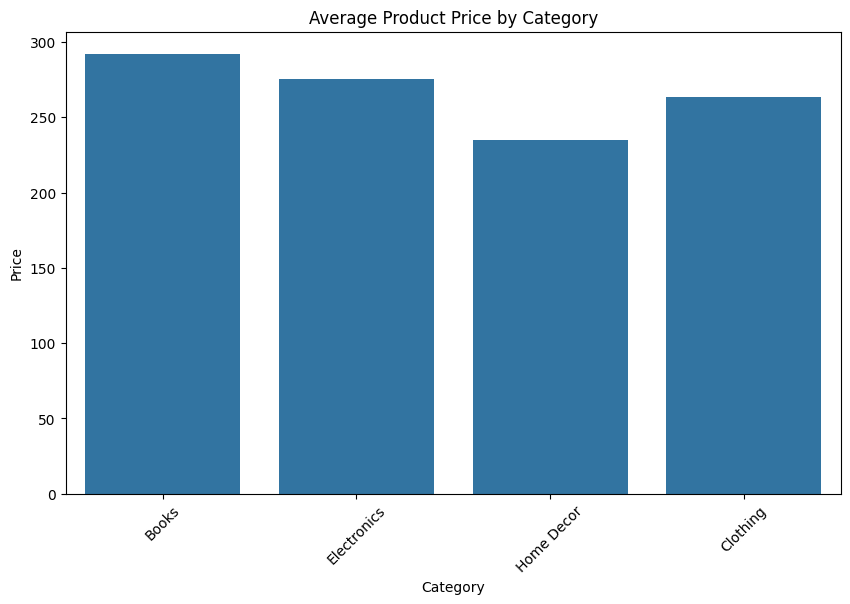

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=products, x='Category', y='Price', ci=None)
plt.title('Average Product Price by Category')
plt.xticks(rotation=45)
plt.show()

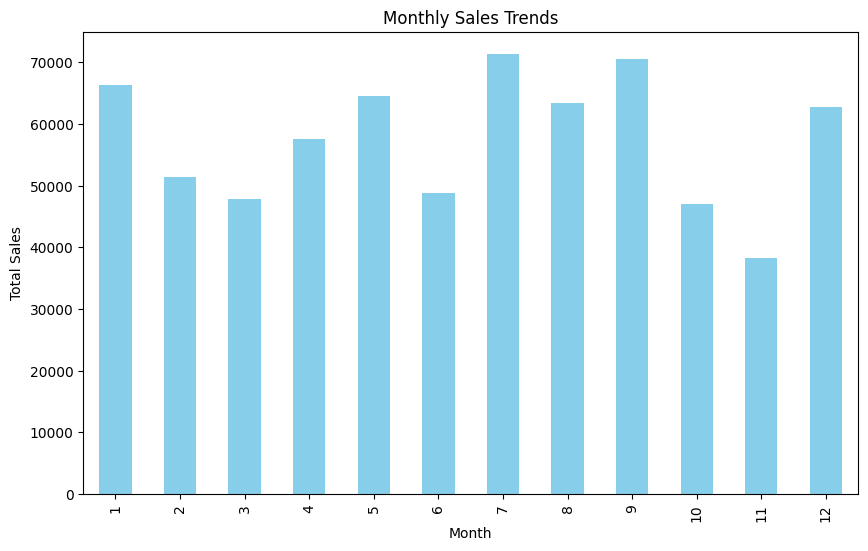

In [12]:
plt.figure(figsize=(10, 6))
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='bar', color='skyblue', title='Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [13]:
popular_categories = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Popular categories based on sales:")
print(popular_categories)

Popular categories based on sales:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [14]:
top_regions = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Top regions based on revenue:")
print(top_regions)

Top regions based on revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [15]:
merged_data.to_csv('/content/merged_data.csv', index=False)

In [19]:
from matplotlib.backends.backend_pdf import PdfPages


with PdfPages('/content/Suman_Adithya_EDA.pdf') as pdf:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
    plt.title('Number of Customers by Region')
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=products, x='Category', y='Price', ci=None)
    plt.title('Average Product Price by Category')
    plt.xticks(rotation=45)
    pdf.savefig()
    plt.close()



<ipython-input-19-b9fd7e9e5167>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=products, x='Category', y='Price', ci=None)
